In [3]:
from IPython.display import SVG
import numpy as np
from sknetwork.ranking import PageRank
from sknetwork.visualization import svg_graph, svg_bigraph
from sknetwork.data import from_edge_list, from_adjacency_list, block_model
import matplotlib.pyplot as plt
from scipy import sparse
import random
from collections import Counter
from scipy.stats import entropy
import seaborn as sns
from tqdm import tqdm
from scipy.sparse import csr_matrix


Create a graph with a dominant node

In [3]:
graph = block_model([100,1], p_in=[0.1,0.001], p_out=0.98, metadata=True)
adjacency = graph.adjacency
labels = graph.labels

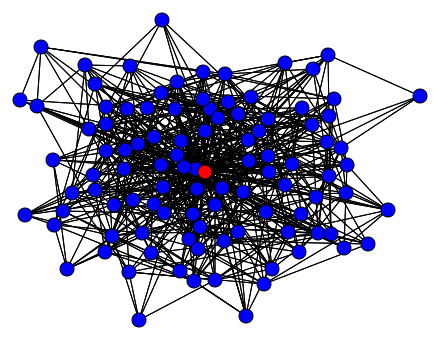

In [4]:
image = svg_graph(graph.adjacency, labels=graph.labels)
SVG(image)

In [2]:
pagerank = PageRank()
scores = pagerank.fit_predict(graph.adjacency)
print("Entropy: ", entropy(scores))
plt.scatter(range(len(scores)),scores)
plt.title("Entropy: ", entropy(scores))
plt.ylabel("Pagerank scores")

NameError: name 'PageRank' is not defined

Modify the graph by isolating the dominant node

In [6]:
modified_graph = graph.adjacency.toarray()
modified_graph[len(modified_graph)-1,:] = False
modified_graph[:,len(modified_graph)-1] = False
modified_graph = csr_matrix(modified_graph)

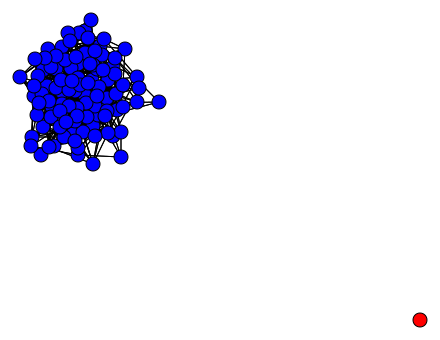

In [7]:
image = svg_graph(modified_graph, labels=graph.labels)
SVG(image)

4.584207572727377


Text(0, 0.5, 'Pagerank scores')

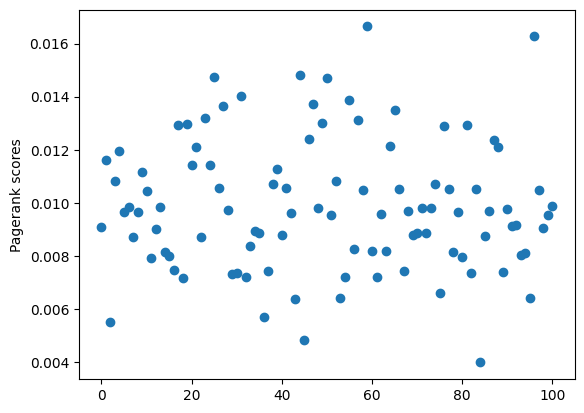

In [8]:
pagerank = PageRank()
scores_modified = pagerank.fit_predict(modified_graph)
print("Entropy: ", entropy(scores_modified))
plt.scatter(range(len(scores_modified)),scores_modified)
plt.ylabel("Pagerank scores")

Plot 

fonction to calculate the difference of entropy between a graph and a graph with dominanat node isolated

In [9]:
def delta_entropy(nbr_cluster_1, nbr_cluster_2, proba_in, proba_out):
    graph = block_model([nbr_cluster_1,nbr_cluster_2], p_in=[proba_in,0.001], p_out=proba_out, metadata=True)
    adjacency = graph.adjacency
    labels = graph.labels

    modified_graph = graph.adjacency.toarray()
    modified_graph[len(modified_graph)-1,:] = False
    modified_graph[:,len(modified_graph)-1] = False
    modified_graph = csr_matrix(modified_graph)

    pagerank = PageRank()
    scores = pagerank.fit_predict(graph.adjacency)
    scores_modified = pagerank.fit_predict(modified_graph)

    delta_entropy = entropy(scores_modified) - entropy(scores)

    return delta_entropy

fonction to calculate the mean delta entropy of given graph caracteristics 

In [10]:
def mean_difference_entropy(nbr_cluster_1, nbr_cluster_2, proba_in, proba_out,nbr_iteration):
    sum = 0
    for i in range(nbr_iteration):
        sum += delta_entropy(nbr_cluster_1, nbr_cluster_2, proba_in, proba_out)
    return sum/nbr_iteration

In [11]:
nbr_cluster_1 = 100
nbr_cluster_2 = 1
proba_in = 0.1
proba_out = 0.9

nbr_iteration = 100
print(mean_difference_entropy(nbr_cluster_1, nbr_cluster_2, proba_in, proba_out,nbr_iteration))

0.06897885786415837


1 10
1 20
1 30
1 40
1 50
1 60
1 70
1 80
1 90
1 100
2 10
2 20
2 30
2 40
2 50
2 60
2 70
2 80
2 90
2 100
3 10
3 20
3 30
3 40
3 50
3 60
3 70
3 80
3 90
3 100
4 10
4 20
4 30
4 40
4 50
4 60
4 70
4 80
4 90
4 100


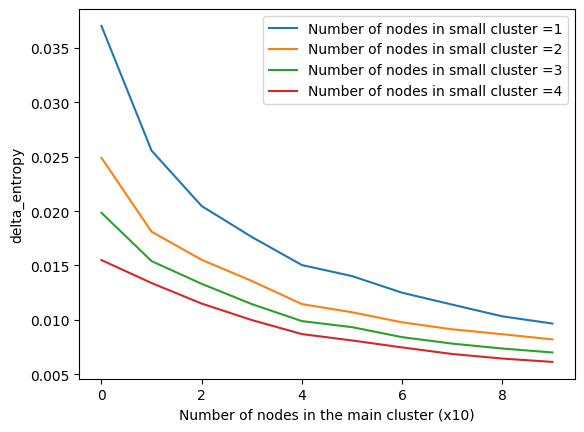

In [17]:
nbr_cluster_1 = np.arange(1, 5, step=1) 
nbr_cluster_2 = np.arange(10, 101, step=10)  
proba_in = 0.1
proba_out = 0.9

nbr_iteration = 500

M = []
for i in nbr_cluster_1:
    L = []
    for j in nbr_cluster_2:
        print(i,j)
        L.append(mean_difference_entropy(i, j, 0.1, 0.9,nbr_iteration))
    plt.plot(L, label=f'Number of nodes in small cluster ={i}')
    plt.legend()
    plt.ylabel("delta_entropy")
    plt.xlabel("Number of nodes in the main cluster (x10)")
    M.append(L)

In [ ]:
# try to do a 3D map of entropy(nbr_cluster_1, nbr_cluster_2)

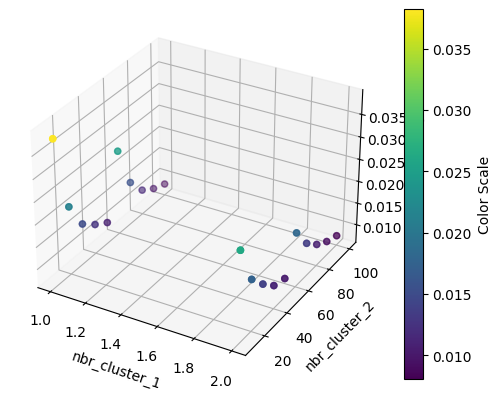

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose you have already populated your matrix M
# M is assumed to be a list of lists where each inner list represents a row

# Convert M to a NumPy array for easier manipulation
M = np.array(M)

# Create coordinate grids for x, y, and z
x, y = np.meshgrid(nbr_cluster_1, nbr_cluster_2)
z = M

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis')

# Add labels and a color bar
ax.set_xlabel('nbr_cluster_1')
ax.set_ylabel('nbr_cluster_2')
ax.set_zlabel('delta_entropy')
cbar = plt.colorbar(ax.scatter(x, y, z, c=z, cmap='viridis'), ax=ax)
cbar.set_label('Color Scale')

plt.show()